12.2.a

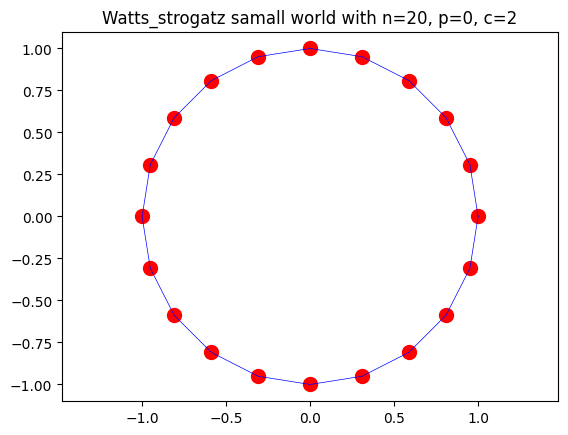

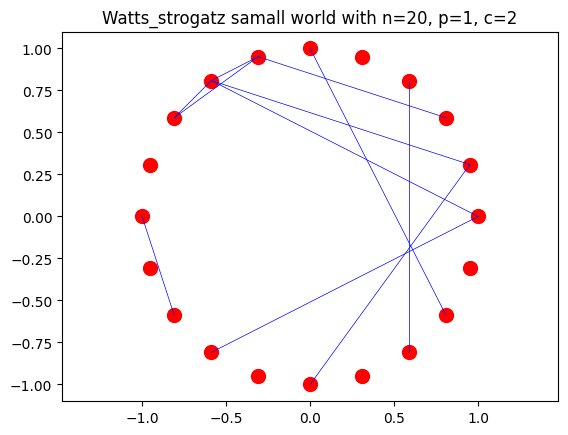

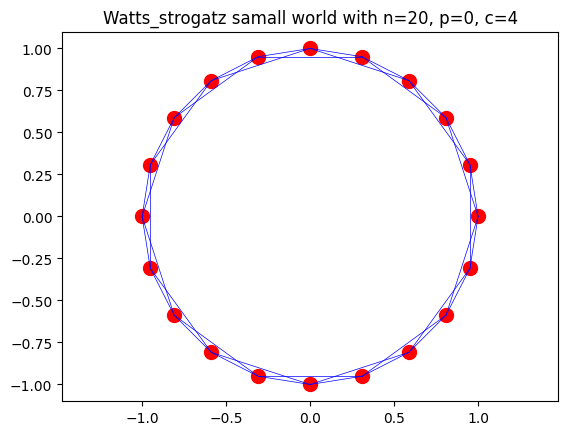

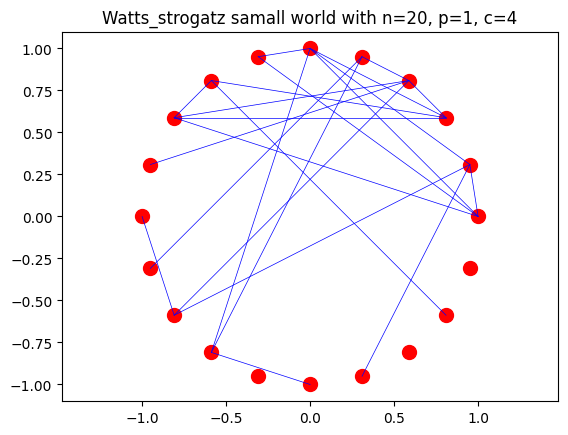

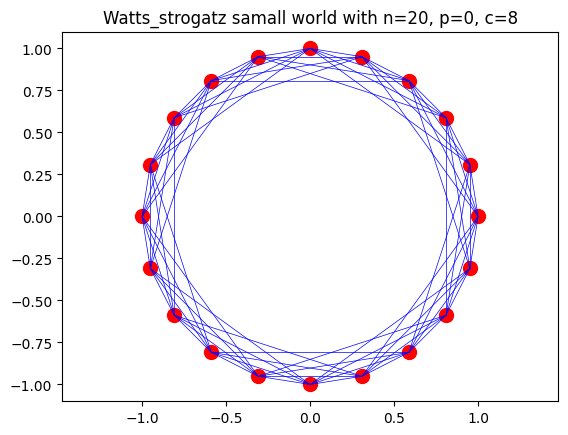

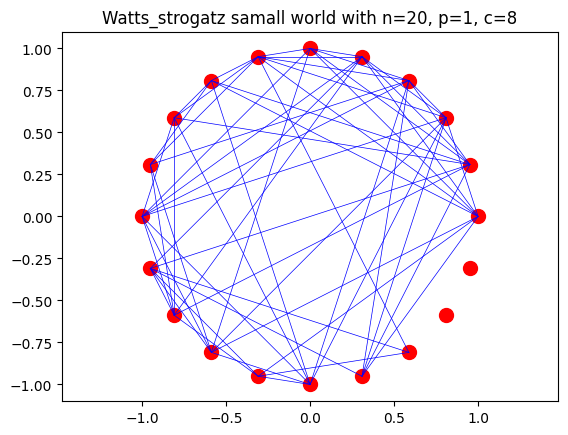

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def watts_strogatz_graph(n, k, p):
    G = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(1, k // 2 + 1):
            G[i, (i + j) % n] = 1
            G[i, (i - j) % n] = 1

    for i in range(n):
        for j in range(n):
            if G[i, j] == 1 and np.random.rand() < p:
                G[i, j] = 0
                rand_node = np.random.randint(0, n - 1)
                while rand_node == i or G[i, rand_node] == 1:
                    rand_node = np.random.randint(0, n - 1)
                G[i, rand_node] = 1

    return G

def plot_graph_circular(G):
    angles = np.linspace(0, 2 * np.pi, G.shape[0], endpoint=False)
    positions = np.column_stack([np.cos(angles), np.sin(angles)])

    plt.figure()
    for i in range(G.shape[0]):
        for j in range(i + 1, G.shape[0]):
            if G[i, j] == 1:
                plt.plot([positions[i, 0], positions[j, 0]], [positions[i, 1], positions[j, 1]], color='blue', linewidth= 0.5)

    plt.scatter(positions[:, 0], positions[:, 1], c='red', s=100)
    plt.axis('equal')
    plt.title(f'Watts_strogatz samall world with n={n}, p={p}, c={c}')
    plt.show()


n = 20  
c_list = [2,4,8]  
p_list = [0,1]  

for c in c_list:
    for p in p_list:
        ws_graph = watts_strogatz_graph(n, c, p)

        plot_graph_circular(ws_graph)
